<a href="https://colab.research.google.com/github/Atharv09007/Cryptonite_taskphas_1/blob/main/final_linear_regression_using_only_rm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.7325382717954634 0.5023232927678132


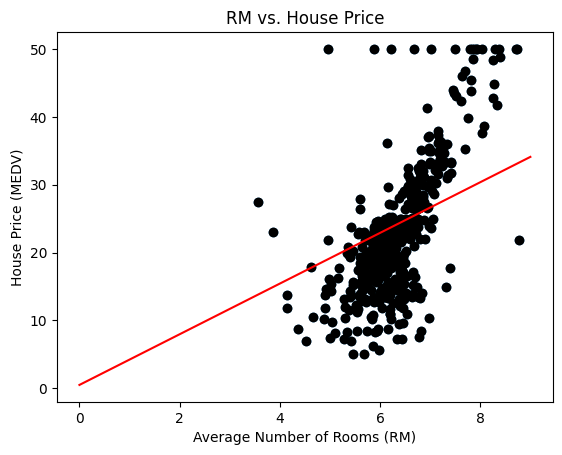

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
csv_data = requests.get(url).text
data = pd.read_csv(StringIO(csv_data))

# Select a single feature (e.g., 'RM') for the x-axis
X = data['rm'].values
y = data["medv"].values # target (house price)

# Plot the single feature against the target
plt.scatter(X, y)

# Add plot title and labels for clarity
plt.title('RM vs. House Price')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price (MEDV)')

#loss function
def loss_function(m, b, points): #Making loss function
    total_error = 0
    for i in range (len(points)): # for loop through each row (data point) in the dataset
        X = points.iloc[i].rm  # take the value of 'rm' (average rooms) for this house
        y = points.iloc[i].medv # take the actual house price (the target value)
        total_error += (y- (m * X - b)) ** 2 # total error swhich is summmition of all the previuos errors
    return total_error / float(len(points))

def gradient_descend(m_now, b_now,X,y, points, learning_rate): # Initialize gradients (slopes of the cost function w.r.t m and b)

    m_gradient = 0
    b_gradient = 0
    n =len(points) # Number of data points
    for i in range(n):  # Loop through all points in the dataset
        X = points.iloc[i].rm # Feature value
        y = points.iloc[i].medv # Actual target

 # Partial derivative of cost w.r.t m
        # Formula: dJ/dm = (-2/n) * Σ [x * (y - (mx + b))]
        m_gradient += -2/n * X * (y - (m_now * X -b_now))
# Partial derivative of cost w.r.t b
        # Formula: dJ/db = (-2/n) * Σ [y - (mx + b)]
        b_gradient += -2/n *  (y - (m_now * X -b_now))

  # m_new = m_old - (learning_rate * gradient_of_m)
    m = m_now - m_gradient *learning_rate
  # b_new = b_old - (learning_rate * gradient_of_b)
    b = b_now - b_gradient * learning_rate
    return m,b

m =0
b =0
learning_rate = 0.0001
epochs = 1000

for i in range(epochs):
    m, b = gradient_descend(m,b,X,y,data, learning_rate)


print(m,b)
plt.scatter(data.rm, data.medv, color="black")
plt.plot(list(range(0,10)), [m * X + b for X in range (0,10) ],color="red")
plt.show()



